In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv",index_col='id')

In [5]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [7]:
data = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [8]:
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


In [9]:
from sklearn.decomposition import PCA
pca_29 = PCA(n_components=29,random_state=0)
pca_29.fit(data)

PCA(n_components=29, random_state=100)

In [22]:
data_pca_29 = pca_29.fit_transform(data)
pca_29.explained_variance_ratio_ * 100

array([6.27048219, 5.03138862, 4.54800267, 4.01260779, 3.86598244,
       3.66095286, 3.52048191, 3.50779035, 3.50456007, 3.48597361,
       3.47950962, 3.46144041, 3.45471781, 3.44865391, 3.44159084,
       3.43414027, 3.42654439, 3.408401  , 3.39762594, 3.38033027,
       3.37240794, 3.29009856, 3.1755181 , 2.89329233, 2.8290607 ,
       2.72597183, 2.50688701, 2.27530529, 1.19028126])

In [23]:
np.cumsum(pca_29.explained_variance_ratio_ * 100)

array([  6.27048219,  11.3018708 ,  15.84987348,  19.86248127,
        23.72846371,  27.38941657,  30.90989848,  34.41768883,
        37.9222489 ,  41.40822252,  44.88773213,  48.34917254,
        51.80389035,  55.25254427,  58.6941351 ,  62.12827537,
        65.55481976,  68.96322076,  72.36084671,  75.74117698,
        79.11358491,  82.40368348,  85.57920157,  88.47249391,
        91.30155461,  94.02752644,  96.53441345,  98.80971874,
       100.        ])

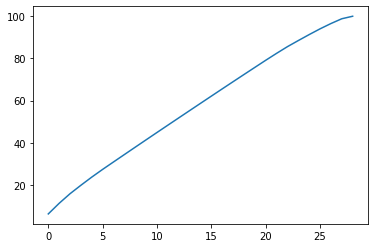

In [19]:
plt.plot(np.cumsum(pca_29.explained_variance_ratio_ * 100))

In [29]:
pca_20 = PCA(n_components=20)
pca_20.fit(data)
data_pca_20 = pca_20.fit_transform(data)

In [31]:
data_reduced = pd.DataFrame(data_pca_20)
data_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.719058,-0.018428,-1.014898,-1.852300,0.826982,0.114979,0.576083,-0.833193,1.125217,1.774150,-0.294687,-0.472469,-0.446818,1.538234,0.625080,-1.036402,-0.031938,0.708038,-0.441667,-0.419596
1,-1.012098,-0.920654,1.886847,1.260584,-0.212045,-1.256363,0.162246,-0.116176,-0.307030,1.164314,-0.025781,1.785673,0.575797,0.888766,0.878695,-1.086363,0.606499,-0.281521,-0.514156,0.529182
2,-1.370615,0.585542,-1.257203,0.820805,-0.151678,-0.570685,0.676353,-0.316492,1.164202,1.284616,-0.301215,-1.904486,0.248715,-0.171749,-0.923975,0.179910,-0.174228,-0.007068,0.125229,-2.126750
3,1.218932,0.171315,0.230498,1.053605,0.578840,-0.287229,-0.876048,0.081418,-0.350356,-0.760648,0.961114,-1.535650,-0.842737,-0.435367,0.531900,-0.450515,-0.089047,-0.000508,1.295040,1.347752
4,-1.025793,-0.151604,1.437407,2.500153,-0.523530,-0.436372,-2.411039,-0.901765,0.105160,0.014072,0.437853,0.381350,-0.922705,-0.070778,0.258698,0.997043,-0.159164,0.802116,0.415776,-1.944199


In [32]:
# neighbours = NearestNeighbors(n_neighbors=40)
# neighbours_fit = neighbours.fit(data_reduced)
# dist,index = neighbours_fit.kneighbors(data_reduced)

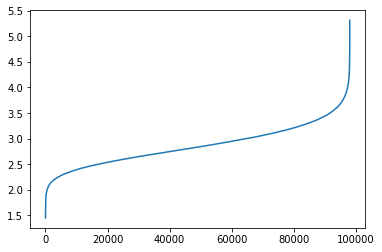

In [33]:
# dist = np.sort(dist,axis=0)
# dist = dist[:,1]
# plt.plot(dist)

In [61]:
# db = DBSCAN(eps=6 , min_samples=40)
# db.fit(data_reduced)
# y = db.labels_

In [62]:
# n_clusters = len(set(y)) - (1 if -1 in y else 0)
# n_noise = list(y).count(-1)

In [63]:
#n_clusters,n_noise

(1, 0)

In [64]:
from sklearn.cluster import KMeans

In [66]:
silhouette_avg = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_pca_20)
    clus_labels = kmeans.labels_
    print(clus_labels)
    
    silhouette_avg.append(metrics.silhouette_score(data_pca_20,clus_labels))
    
    
    

[0 0 0 ... 1 0 0]
[2 0 2 ... 2 1 0]
[0 2 0 ... 3 1 0]
[3 2 3 ... 1 1 3]
[1 0 1 ... 3 2 1]
[1 5 0 ... 4 6 1]
[2 4 7 ... 6 5 2]
[5 6 1 ... 8 3 5]
[4 3 5 ... 1 8 4]
[ 7  2 10 ...  9  0  7]


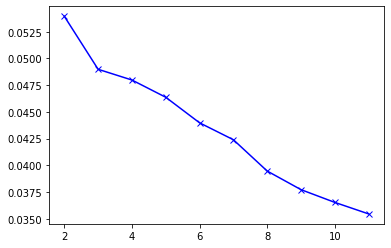

In [68]:
plt.plot(range(2,12),silhouette_avg,"bx-")

In [69]:
inertia_avg = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_pca_20)
    inertia_avg.append(kmeans.inertia_)

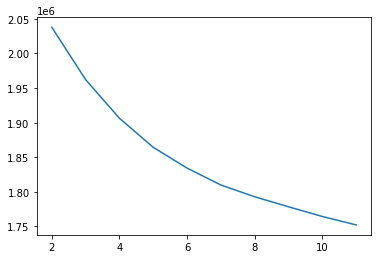

In [71]:
plt.plot(range(2,12),inertia_avg)

In [77]:
kmeans_opt = KMeans(n_clusters=6,random_state=0)
kmeans_opt.fit(data_reduced)
y = kmeans_opt.predict(data_reduced)

In [78]:
df_result = pd.DataFrame(columns=["Predicted"])
df_result['Predicted']=y
df_result.reset_index(inplace=True)
df_result.rename(columns={"index":"id"},inplace=True)

In [79]:
df_result.to_csv("pca_20_kmeans.csv",index=False)